# 前書き

今回は今まで学習した機械学習(主に教師あり学習)のまとめとして、

一連の流れのおさらいと今回テクニックについて触れ、本格的なデータセットと

完全な未知データを用いた教師あり機械学習の演習を行う。

## 1. 教師あり学習の流れ

教師ありの機械学習についてまとめると、大きく下記のステップに分けられる。

- ステップ１．データの収集とデータの理解
- ステップ２．教師あり学習に向けたデータの変換と作成
- ステップ３．学習器の作成

これらについて今まで学んだ内容を下記にまとめ、さらなる精度向上のヒントとなる

テクニックについて触れる。

## 1-1. ステップ１．データの収集とデータの理解

このステップは下記3つに細分化される。

- データの収集
- 整然データの作成
- データの分析・考察

### データの収集

機械学習を行うにあたり、実務においてはデータを集めることからはめる。

そして、機械学習で高い精度を出すために最も重要な作業はデータの収集といっても過言ではない。

なぜなら、何らかの予測を行うためには目的変数と関連性のある説明変数が必要となるため、

関連性のないデータを大量に集めたとしても意味がない。

達成したい目的に沿ったデータをいかに集められるかが、より高い精度を出すために重要である。

### 整然データの作成

データを集めた後は欠損値の処理やデータの結合等を行い、データ分析や機械学習が行いやすい形に

変換する必要がある。

なお、今までに使ってきた練習用のデータは最初から整然データであった。

Pythonにおいては、主にPandasの機能を用いて整然データを作成する。

### データの分析・考察

集めたデータを整然データにした後は、集めたデータに対する理解を深めることが重要となる。

データ収集の項目で述べた様に、関連性のないデータであれば意味がないため、

データの分析と考察を行い再度データの収集に戻る必要があるかどうかを判断する必要がある。

また、有用なデータであった場合、この作業でデータの特徴を正しく把握することにより、

この後に続くステップにおいて適切な判断ができる様になり、精度向上に貢献する。

少ないコードでデータの理解を深めるために有用な分析方法として、例えば下記があげられる。

- データフレームオブジェクトのcorr()メソッド(変数間の相関)
- pandas.plottingのscatter_matrix()関数(各変数のヒストグラムと変数間の散布図)
- pandas_profilingのProfileReport()関数(基本的な分析レポートの作成)
- DBSCANやt-SNEといった教師なし学習を用いた可視化や分析

## 1-2. ステップ２．教師あり学習に向けたデータの変換と作成

ステップ１の後は、具体的な教師あり学習に向けたステップへと移る。

このステップは下記３つに細分化される。

- 訓練データとテストデータに分割
- 前処理
- 特徴量の作成

### 訓練データのテストデータに分割

教師あり学習は未知のデータに対して正しく予測できることを重視する。

そのため、訓練データとテストデータに分割し、訓練データを用いて学習モデルを構築する。

その後、疑似的な未知データであるテストデータを用いて精度の確認を行う。

分割時に注意しなければならない点としては、訓練データとテストデータの比率や、

データの偏りがあげられる。

特にデータセットの規模が小さい時や、不均衡なデータセットを扱う際には、偶然精度が高くなるといった現象が発生しやすいため、注意深く行う必要がある。

実際に分割を行うコードとしては、sklearn.model_selectionのtrain_test_split関数が利用される。

### 前処理

前処理とは、この後のステップで行う学習器の作成の前に行う特徴量の変換や

特徴量選択（不要な説明変数の削除）といった処理のことを指す。

特徴量の変換は、具体的には下記にあげる処理がある。

- スケーリング処理
- 分布形状の変換処理
- 外れ値の処理(clipping)
- 順位づけ処理
- 数値変数をカテゴリ変数に変換(binning)
- カテゴリ変数の変換処理

### スケーリング処理

スケーリング処理は各特徴量の単位や値の大きさといったスケールを統一するための処理のことである。

平均0、分散1のスケールに調整するsklearn.preprocessingのStandardScalerクラスや、

最小0、最大1のスケールに調整するMinMaxScalerクラスがある。

### 分布形状の変換処理

スケーリング処理は特徴量の値が伸縮するだけであるため、分布形状は変わらない。

場合によっては、分布の形状事態を変換すると精度が上がることもある。

具体的には、正規分布に近づく様に分布の形状変換を行うことが多く、

sklearn.preprocessingに用意されているPowerTransformerクラスで行うことができる。

### 外れ値の処理(clipping)

学習アルゴリズムによっては、外れ値の影響を受けることも多い。

そのような場合、特徴量の値の上限と下限を定め、それ以上やそれ以下の値を上限値や下限値に

置き換えることが有効になる。

ndarrayやデータフレームオブジェクトが持つquantileメソッド(分位数の取得)と

clipメソッド(上限値と下限値の置き換え)を用いて変換することが可能。

### 順位づけ処理

順位づけ処理とは、数値特徴量が持つ数値の大きさや間隔といった情報を捨て、

値の大小関係からなる順位に変換する処理のことである。

データフレームオブジェクトのrankメソッドで行うことができる。

### 数値変数をカテゴリ変数に変換(binning)

ある数値特徴量を区間ごとにグループ分けし、カテゴリ変数として扱う変数をbinningと呼ぶ。

pandasのcut関数でbinningを行うことができる。

また、後述のカテゴリ変数の変換処理と組み合わせることも可能。

### カテゴリ変数の変換処理

A, B, C, ...といったカテゴリを表す変数がある場合、そのままでは学習に使えないため

数値に変換する必要がある。

最も代表的で一般的なカテゴリ変数の変換にone-hot encodingがある。

one-hot encodingは、下記に示すように各カテゴリごとに特徴量を作り、0と1で表現する。

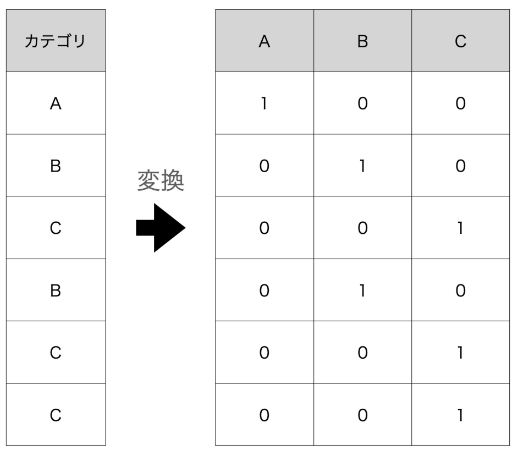

この処理は、pandasのget_dummies関数で行うことができる。

### 特徴量の作成

より精度の高い学習モデルを作成するために、既存のデータから新しい特徴量を作成することが

有効になる場合がある。

例えば、身長と体重からBMIを計算して新しい特徴量にする（他の特徴量を用いた計算による生成）、

k-平均法から生成する各重心からの距離行列を新しい特徴量にする（クラスタイングを用いた特徴量生成）、

主成分分析を行い第１主成分、第２主成分を新しい特徴量にする（次元削減を用いた特徴量生成）、

などがあげられる。

既存の特徴量から独自の計算により新しい特徴量を生成する際、

データ間の意味や目的変数との関係を正しく捉えていなければ精度向上には役立たないため、

データへの深い理解と考察が重要になる。

## 1-3. ステップ３．学習器の作成

ステップ２を経てデータを用意した後は、学習器の作成となる。

このステップを細分化すると下記の２つとなる。

- アルゴリズム選択
- パフォーマンスチューニング

なお、アルゴリズムごとに特徴やデータセットとの相性があるため、

思うような精度が出ない場合ステップ２に戻ることも多い。

### アルゴリズム選択

高い精度を追求する場合、最終的にはランダムフォレストや勾配ぶースティングといった

アンサンブル学習アルゴリズムを選択することが一般的である。

その前段階として、どれくらいの精度を出せそうかを見積もるために、k-最近傍法を用いることが多い。

### パフォーマンスチューニング

未知データに対するアルゴリズムの予測性能を最大限引き出すために、

適切なチューニング作業が必要となる。

主には、過学習に注意しながらハイパーパラメータを調整する作業である。

特にアンサンブル学習アルゴリズムのような複雑なアルゴリズムは、ハイパーパラメータの影響が強く、

適切にチューニングすることが重要となる。

チューニングに便利なクラスとして、sklearn.model_selectionのGridSearchCVがある。

交差検証法による学習モデル構築とハイパーパラメータの探索が行える。

# 2. 演習および課題

## 2-1. 演習

### 演習1.

30メートル四方を1つのセルとした地理データが記述されたデータセット、

Forest_CoverType_data.csvとForest_CoverType_unknown.csvがある。

Forest_CoverType_data.csvは7種類の森林被覆タイプ(Cover_Type列、1～7)が既知のデータセットであり、

Forest_CoverType_unknown.csvは森林被覆タイプが未知のデータセットである。

Forest_CoverType_data.csvを用い森林被覆タイプを分類予測するプログラムを作成し、

Forest_CoverType_unknown.csvの各行の森林被覆タイプを予測せよ。

Forest_CoverType_unknown.csvにはID列がある。これを用い、予測した結果は

下記の形式でForest_CoverType_submit.csvとして出力し、そのファイルを提出せよ。

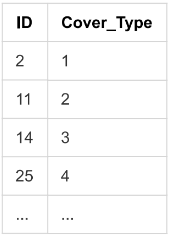

下記に提出ファイル出力までのサンプルプログラムを示す。

Forest_CoverType_data.csvは[ここ](https://github.com/TokitsuKotaro/MachineLearningLesson/blob/main/Forest_CoverType_data.csv)からダウンロードできる。

Forest_CoverType_unknown.csvは[ここ](https://github.com/TokitsuKotaro/MachineLearningLesson/blob/main/Forest_CoverType_unknown.csv)からダウンロードできる。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("Forest_CoverType_data.csv")

X = df.drop("Cover_Type", axis=1)
y = df["Cover_Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = KNeighborsClassifier()
model.fit(X_train, y_train)

score = model.score(X_train, y_train)
print("train score: {}".format(score))
score = model.score(X_test, y_test)
print("test score: {}".format(score))

# 未知データの読み込み
df_unknown = pd.read_csv("Forest_CoverType_unknown.csv")

# ID列は予測に使わないため削除
X_unknown = df_unknown.drop("ID", axis=1)

# 前処理や特徴量作成を行っている場合はここで適切に変換処理を行う

# .predictメソッドで予測
y_pred = model.predict(X_unknown)

# 予測値でCover_Type列を作成
df_unknown["Cover_Type"] = y_pred

# 提出用のファイル作成
df_output = df_unknown[["ID", "Cover_Type"]]
df_output.to_csv("Forest_CoverType_submit.csv", header=True, index=False)

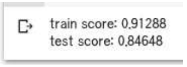

各列名の意味は下記のとおりである。

|列名|意味|単位|
|---|---|---|
|Elevation|標高|メートル|
|Aspect|方位角|度|
|Slope|勾配|度|
|Horizontal_Distance_To_Hydrology|最も近い地表水までの水平方向の距離|メートル|
|Vertical_Distance_To_Hydrology|最も近い地表水までの垂直方向の距離|メートル|
|Horizontal_Distance_To_Roadways|最も近い車道までの水平方向の距離|メートル|
|Hillshade_9am|夏至の午前9時における明るさ|0~255の明るさ|
|Hillshade_noon|夏至の正午における明るさ|0~255の明るさ|
|Hillshade_3pm|夏至の午後3時における明るさ|0~255の明るさ|
|Horizontal_Distance_To_Fire_Points|最も近い山火事が発生した地点までの水平方向の距離|メートル|
|Wilderness_Area_1~4|原野地域タイプのone-hot表現|0, 1|
|Soil_Type_1~40|土壌タイプのone-hot表現|0, 1|
|Cover_Type|森林被覆タイプ|1~7のカテゴリ|

データ数は多いため、計算量の高いアルゴリズムやハイパーパラメータの探索数が多いと非常に時間がかかる。

## 2-2. 課題

### 課題１．

演習のタスクにおいて、より高い精度の予測プログラムを柵瀬せよ。

予測結果はForest_CoverType_submit.csvとして提出せよ。

GoogleColabの場合、リソースや実行時間の制限等があるため、非常に時間のかかるプログラムを

実行する場合には手元の環境で実行することを推奨する。